In [11]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()
# correlate()

ERROR: predictions are a different length than validation sets


In [2]:
# ploth()
# plotscatter()
# correlate()
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p_value:.3g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p_value:.3g}")
    
def collapse_if_identical(lst):
    return lst[0] if all(x == lst[0] for x in lst) else lst
    

# takes in list and returns peak with largest signal
def keep_largest_signal(lst, qn_df):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for peak in lst:
            matching_rows = qn_df[qn_df[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst

# def overlap(start1, end1, start2, end2):
#     return max(0, min(end1, end2)-max(start1, start2))

def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

def mean_squared_error(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return np.mean((x - y) ** 2)

In [41]:
# 5 BEST LOG MODELS FOLDCHANGE
import pandas as pd
import scipy.stats

mhc = 200
def correlate():
    rows = []
    # Lists for correlation calculations
    groups = ['Val2', 'Test2']
    dfs = [val2_foldchange_df, test2_foldchange_df]

    # Calculate correlations
    for group, df in zip(groups, dfs):
        x = df['true'].squeeze()
        y = df['pred'].squeeze()
        pearson, pp = scipy.stats.pearsonr(x, y)
        spearman, ps = scipy.stats.spearmanr(x, y)

        mse = mean_squared_error(x, y)

        same_sign = np.sign(df['true']) == np.sign(df['pred'])
        num_ss = same_sign.sum()
        len_ss = len(df)
        perc_ss = num_ss / len_ss
        
        same_sign_avg = np.sign(df.loc[::2]['true']) == np.sign(df.loc[::2]['avg_pred'])
        num_ssa = same_sign_avg.sum()
        len_ssa = len(df) / 2
        perc_ssa = num_ssa / len_ssa
        
        rows.append({'Group': group, 'Metric': 'Same Sign Count', 'Value': num_ss})
        rows.append({'Group': group, 'Metric': 'Total Count', 'Value': len_ss})
        rows.append({'Group': group, 'Metric': 'Same Sign %', 'Value': perc_ss})
     
        rows.append({'Group': group, 'Metric': 'Pearson', 'Value': pearson})
        rows.append({'Group': group, 'Metric': 'Pearson P-Val', 'Value': pp*mhc})
        rows.append({'Group': group, 'Metric': 'Spearman', 'Value': spearman})
        rows.append({'Group': group, 'Metric': 'Spearman P-Val', 'Value': ps*mhc})
        rows.append({'Group': group, 'Metric': 'MSE', 'Value': mse})
        
    return pd.DataFrame(rows)

# --- Main Script ---
all_results = []
species_list = ['macaque', 'rat', 'cow', 'pig']
model_list = ['bdbi7l3n']

for species in species_list:
    for model in model_list:
        model_dir = f'{model}_FINAL'

        nonMouse_true = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
        mouse_true = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
        one_to_one_peaks_TEST = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
        one_to_one_peaks_VAL = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')

        peaks = one_to_one_peaks_VAL[[4, 14]]

        merged_df = peaks.merge(nonMouse_true, how='left', left_on=4, right_on=3, suffixes=('', '_non'))
        
        # Aligned orthologous peaks
        merged_df = merged_df.merge(mouse_true, how='left', left_on=14, right_on=3, suffixes=('_NON', '_mouse'))

        #############################################################################
        # load MOUSE VAL DF

        pred_mouse_VAL = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_mouse_TRAIN_VAL.csv', header=None)
        
        mouse_train = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/logPos/mouse_liver_TRAINONLY.narrowPeak', sep="\t", header=None)
        mouse_val = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/logPos/mouse_liver_VAL.narrowPeak', sep="\t", header=None)
        
        mouse_train_len = 2*len(mouse_train)
        mouse_val_len = 2*len(mouse_val)

        doubled_mouse_val_df = pd.concat([mouse_val, mouse_val]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_mouse_val_df = doubled_mouse_val_df.rename(columns={0:'mouse_chr'})
    
        pred_mouse_val_df = pred_mouse_VAL.iloc[mouse_train_len:mouse_train_len + mouse_val_len].reset_index(drop=True)
        pred_mouse_val_df = pd.concat([doubled_mouse_val_df.drop(columns=5), pred_mouse_val_df], axis=1)
        pred_mouse_val_df = pred_mouse_val_df.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        merged_mouse_val_true_pred = peaks.merge(pred_mouse_val_df, how='left', left_on=14, right_on=3)
        mouse_val_true_pred = merged_mouse_val_true_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

        #############################################################################
        # load non-mouse VAL2 DF

        pred_VAL = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_{species}_VAL.csv', header=None)
        
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/val_splits/val1/{species}_liver_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        pred_val2_df = pred_VAL.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        doubled_val2_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)

        non_val2_true_pred = doubled_val2_combined.rename(columns={4: 'non_true', 0:'non_pred'})
        merged_non_val2_true_pred = peaks.merge(non_val2_true_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        non_val2_true_pred = merged_non_val2_true_pred.rename(columns={3:'non_peak'}).drop(4, axis=1)
        #############################################################################

        # make VAL2 merged df
        val2_foldchange_df = pd.concat([mouse_val_true_pred, non_val2_true_pred], axis=1)

        foldchange_filename_VAL = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_{species}_VAL.tsv'
        
        val2_foldchange_df.to_csv(foldchange_filename_VAL, sep='\t')
        
        val2_foldchange_df['true'] = val2_foldchange_df['mouse_true']-val2_foldchange_df['non_true']
        val2_foldchange_df['pred'] = val2_foldchange_df['mouse_pred']-val2_foldchange_df['non_pred']
        
        mouse_av = (val2_foldchange_df.loc[::2, 'mouse_pred'].values + val2_foldchange_df.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (val2_foldchange_df.loc[::2, 'non_pred'].values + val2_foldchange_df.loc[1::2, 'non_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        val2_foldchange_df.loc[::2, 'mouse_pred_avg'] = mouse_av
        val2_foldchange_df.loc[::2, 'non_pred_avg'] = mac_av 
        val2_foldchange_df['avg_pred'] = val2_foldchange_df['mouse_pred_avg']-val2_foldchange_df['non_pred_avg']

        #############################################################################
        # TIME FOR TEST2 FOLDCHANGE

        peaks = one_to_one_peaks_TEST[[4, 14]]

        merged_df = peaks.merge(nonMouse_true, how='left', left_on=4, right_on=3, suffixes=('', '_non'))
        
        # Aligned orthologous peaks
        merged_df = merged_df.merge(mouse_true, how='left', left_on=14, right_on=3, suffixes=('_NON', '_mouse'))

        #############################################################################
        
        # load MOUSE TEST DF

        pred_mouse_TEST = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_mouse_TEST.csv', header=None)
        
        mouse_test = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
        
        mouse_test_len = 2*len(mouse_test)

        doubled_mouse_test_df = pd.concat([mouse_test, mouse_test]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_mouse_test_df = doubled_mouse_test_df.rename(columns={0:'mouse_chr'})
    
        pred_mouse_test_df = pred_mouse_TEST.head(mouse_test_len).reset_index(drop=True)
        pred_mouse_test_df = pd.concat([doubled_mouse_test_df.drop(columns=5), pred_mouse_test_df], axis=1)
        pred_mouse_test_df = pred_mouse_test_df.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        merged_mouse_test_true_pred = peaks.merge(pred_mouse_test_df, how='left', left_on=14, right_on=3)
        mouse_test_true_pred = merged_mouse_test_true_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

        #############################################################################
        # load nonmouse TEST2 DF
        
        pred_TEST = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).rename(columns={0: 'mac_chr'})
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        pred_test2_df = pred_TEST.iloc[test1_len:test1_len + test2_len].reset_index(drop=True)
        doubled_test2_combined = pd.concat([doubled_test2_df, pred_test2_df], axis=1)

        non_test2_true_pred = doubled_test2_combined.rename(columns={4: 'non_true', 0:'non_pred'})
        merged_non_test2_true_pred = peaks.merge(non_test2_true_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        non_test2_true_pred = merged_non_test2_true_pred.rename(columns={3:'non_peak'}).drop(4, axis=1)

        #############################################################################

        # make TEST2 merged df
        test2_foldchange_df = pd.concat([mouse_test_true_pred, non_test2_true_pred], axis=1)

        foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_{species}.tsv'
        
        test2_foldchange_df.to_csv(foldchange_filename, sep='\t')
        
        test2_foldchange_df['true'] = test2_foldchange_df['mouse_true']-test2_foldchange_df['non_true']
        test2_foldchange_df['pred'] = test2_foldchange_df['mouse_pred']-test2_foldchange_df['non_pred']
        
        mouse_av = (test2_foldchange_df.loc[::2, 'mouse_pred'].values + test2_foldchange_df.loc[1::2, 'mouse_pred'].values) / 2
        non_av = (test2_foldchange_df.loc[::2, 'non_pred'].values + test2_foldchange_df.loc[1::2, 'non_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        test2_foldchange_df.loc[::2, 'mouse_pred_avg'] = mouse_av
        test2_foldchange_df.loc[::2, 'non_pred_avg'] = non_av 
        test2_foldchange_df['avg_pred'] = test2_foldchange_df['mouse_pred_avg']-test2_foldchange_df['non_pred_avg']
        
        corr_df = correlate()
        corr_df['Species'] = species
        corr_df['model'] = model
        all_results.append(corr_df)
        


#############################################################################

summary_df = pd.concat(all_results)

custom_group_order = [ 'Val2', 'Test2' ]
custom_metric_order = ['Same Sign Count', 'Total Count', 'Same Sign %', 'Pearson', 'Pearson P-Val', 'Spearman', 'Spearman P-Val', 'MSE']

# # Convert 'group' to a categorical type with the specified order.
summary_df['Group'] = pd.Categorical(summary_df['Group'], categories=custom_group_order, ordered=True)
summary_df['Metric'] = pd.Categorical(summary_df['Metric'], categories=custom_metric_order, ordered=True)


pivot_df = summary_df.pivot_table(
    index=["Species", "Group", "Metric"],
    columns="model",
    values="Value"
).reset_index()

pivot_df = pivot_df.sort_values(by=["Species", "Group", "Metric"])

pivot_df = pivot_df[["Species", "Group", "Metric"] + model_list]
# pivot_df_reordered = pivot_df[model_list]

def format_value(metric, value):
    """Format values depending on whether it's a P-Val metric or not."""
    if "P-Val" in metric:
        return f"{value:.2e}"   # scientific notation, 3 sig figs
    else:
        return f"{value:.3g}"   # regular decimal, 3 sig figs

# Apply formatting to a copy just for display/export
pivot_df_display = pivot_df.copy()
for col in model_list:  # each model column
    pivot_df_display[col] = pivot_df_display.apply(
        lambda row: format_value(row["Metric"], row[col]),
        axis=1
    )

display(pivot_df_display)

output_filename = '/home/azstephe/liverRegression/regression_liver/data/figs/tables/log_model_foldchange_table_FINAL_mse.tsv'
# pivot_df_display.to_csv(output_filename, sep='\t')

# print(f'Results successfully saved to: {output_filename}')


model,Species,Group,Metric,bdbi7l3n
0,cow,Val2,Same Sign Count,200
1,cow,Val2,Total Count,330
2,cow,Val2,Same Sign %,0.606
3,cow,Val2,Pearson,0.259
4,cow,Val2,Pearson P-Val,3.80e-04
...,...,...,...,...
59,rat,Test2,Pearson,0.177
60,rat,Test2,Pearson P-Val,2.53e-09
61,rat,Test2,Spearman,0.153
62,rat,Test2,Spearman P-Val,1.17e-06


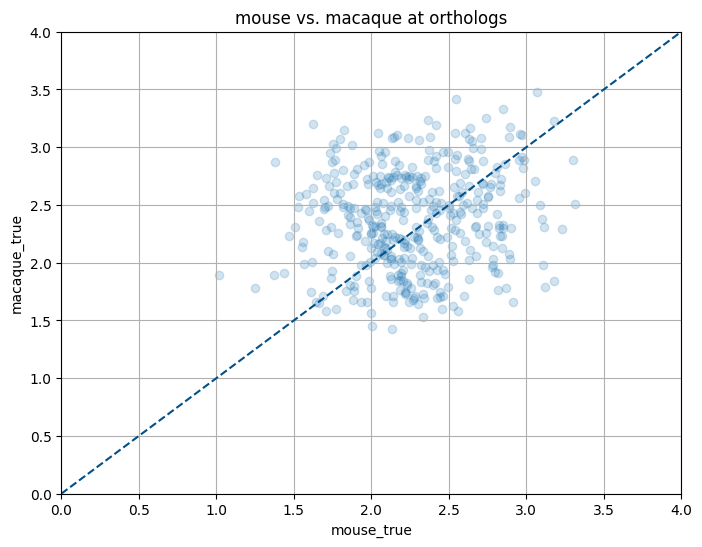

Pearson correlation coefficient for macaque: 0.1503, p-value: 0.002608
Spearman correlation coefficient for macaque: 0.1258, p-value: 0.01192


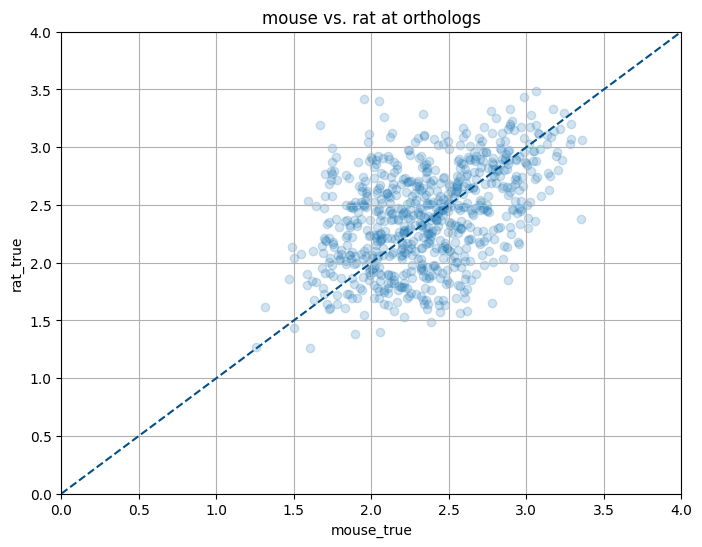

Pearson correlation coefficient for rat: 0.4383, p-value: 4.193e-35
Spearman correlation coefficient for rat: 0.4096, p-value: 1.861e-30


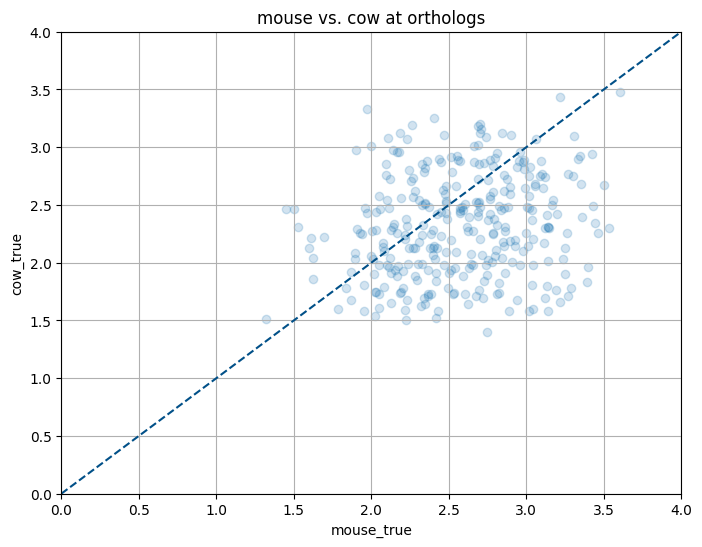

Pearson correlation coefficient for cow: 0.1861, p-value: 0.001013
Spearman correlation coefficient for cow: 0.1812, p-value: 0.001376


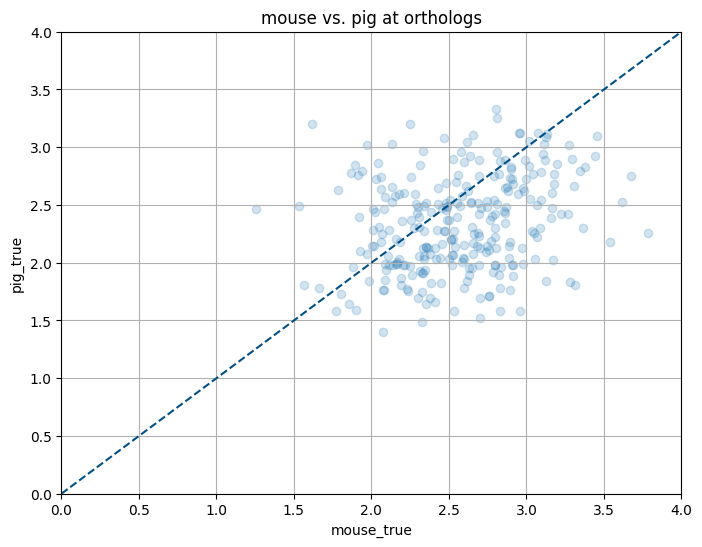

Pearson correlation coefficient for pig: 0.2528, p-value: 2.463e-05
Spearman correlation coefficient for pig: 0.2621, p-value: 1.19e-05


In [31]:
for species in species_list:
    foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_{species}.tsv'
    dff = pd.read_csv(foldchange_filename, sep='\t')
    df = dff[::2]
    scatter(df['mouse_true'], df['non_true'], f"mouse vs. {species} at orthologs", 'mouse_true', f'{species}_true')
    correlations(df['mouse_true'], df['non_true'], f'{species}')


In [27]:
species = 'rat'
foldchange_filename = '/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_{species}.tsv'
dff = pd.read_csv(foldchange_filename, sep='\t')
dff

,Unnamed: 0,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1.1,2.1,non_peak,non_true,non_pred
0,0,peak3020,chr2,3229009,3229509,peak11427,2.874913,1.395323,chr10,51301246,51301746,peak3020,2.597408,1.375391
1,1,peak3020,chr2,3229009,3229509,peak11427,2.874913,1.404231,chr10,51301246,51301746,peak3020,2.597408,1.451438
2,2,peak3028,chr2,4222144,4222644,peak11441,1.979071,1.313839,chr10,52387605,52388105,peak3028,2.116055,1.351348
3,3,peak3028,chr2,4222144,4222644,peak11441,1.979071,1.213640,chr10,52387605,52388105,peak3028,2.116055,1.279521
4,4,peak13844,chr1,4544057,4544557,peak22,2.436104,0.765562,chr4,83935749,83936249,peak13844,2.025274,0.582152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,539,peak19955,chr1,195018073,195018573,peak1969,2.492961,0.747234,chr9,148525642,148526142,peak19955,1.530375,0.949914
540,540,peak19958,chr1,195033938,195034438,peak1970,2.576299,0.772597,chr9,148548648,148549148,peak19958,2.150361,0.974256
541,541,peak19958,chr1,195033938,195034438,peak1970,2.576299,0.796396,chr9,148548648,148549148,peak19958,2.150361,0.984838
542,542,peak19959,chr1,195040379,195040879,peak1972,2.505015,1.049255,chr9,148557288,148557788,peak19959,2.431625,1.258536


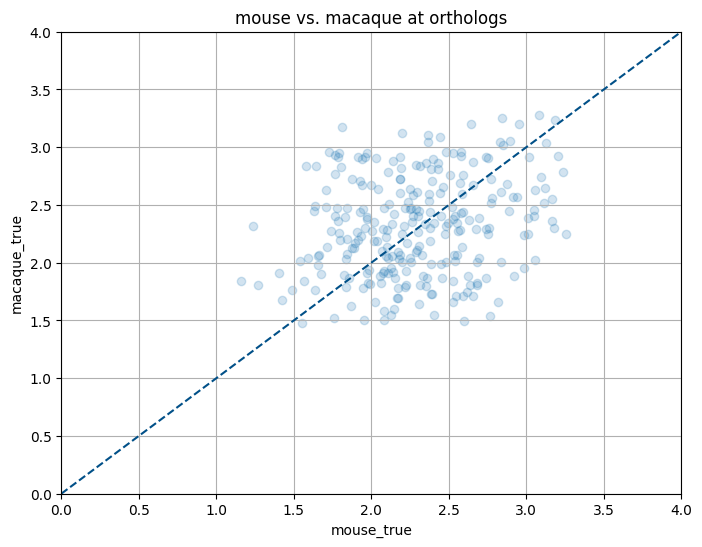

Pearson correlation coefficient for macaque: 0.2295, p-value: 0.0001899
Spearman correlation coefficient for macaque: 0.1963, p-value: 0.001467


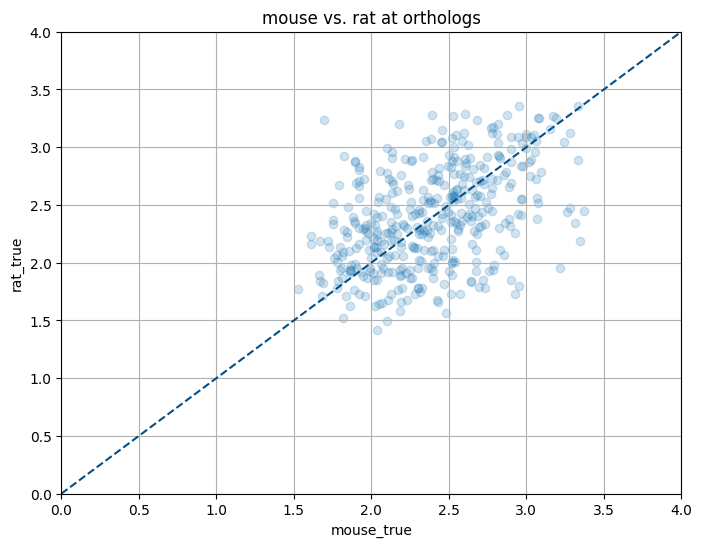

Pearson correlation coefficient for rat: 0.4523, p-value: 1.832e-21
Spearman correlation coefficient for rat: 0.4523, p-value: 1.829e-21


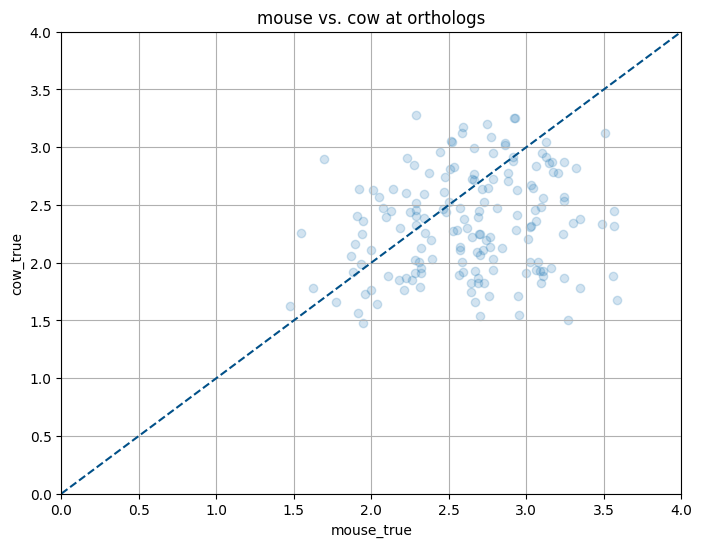

Pearson correlation coefficient for cow: 0.1751, p-value: 0.02448
Spearman correlation coefficient for cow: 0.1657, p-value: 0.03342


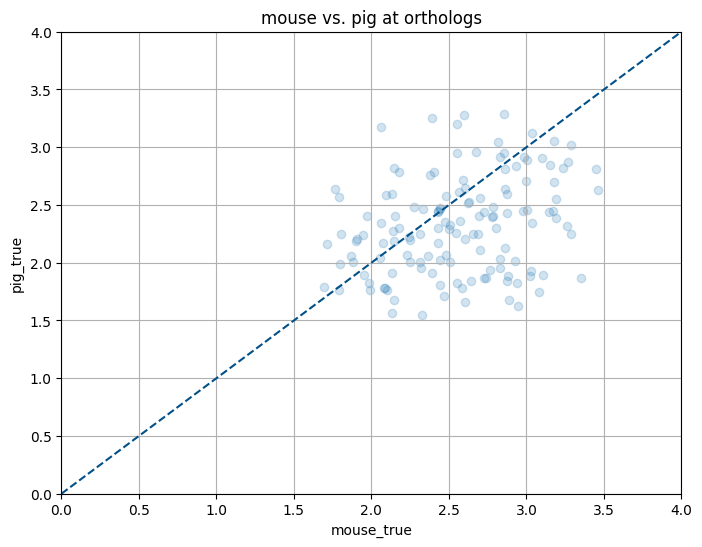

Pearson correlation coefficient for pig: 0.2840, p-value: 0.0007357
Spearman correlation coefficient for pig: 0.2835, p-value: 0.0007541


In [42]:
for species in species_list:
    foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_{species}_VAL.tsv'
    dff = pd.read_csv(foldchange_filename, sep='\t')
    df = dff[::2]
    scatter(df['mouse_true'], df['non_true'], f"mouse vs. {species} at orthologs", 'mouse_true', f'{species}_true')
    correlations(df['mouse_true'], df['non_true'], f'{species}')

In [36]:
foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_macaque_VAL.tsv'
pd.read_csv(foldchange_filename, sep='\t')

,Unnamed: 0,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1.1,2.1,non_peak,non_true,non_pred,true,pred,mouse_pred_avg,non_pred_avg,avg_pred
0,0,peak3020,chr2,3229009,3229509,peak11427,2.874913,1.395323,chr10,51301246,51301746,peak3020,2.597408,1.375391,0.277505,0.019931,1.399777,1.413415,-0.013638
1,1,peak3020,chr2,3229009,3229509,peak11427,2.874913,1.404231,chr10,51301246,51301746,peak3020,2.597408,1.451438,0.277505,-0.047207,NaN,NaN,NaN
2,2,peak3028,chr2,4222144,4222644,peak11441,1.979071,1.313839,chr10,52387605,52388105,peak3028,2.116055,1.351348,-0.136984,-0.037509,1.263740,1.315435,-0.051695
3,3,peak3028,chr2,4222144,4222644,peak11441,1.979071,1.213640,chr10,52387605,52388105,peak3028,2.116055,1.279521,-0.136984,-0.065881,NaN,NaN,NaN
4,4,peak13844,chr1,4544057,4544557,peak22,2.436104,0.765562,chr4,83935749,83936249,peak13844,2.025274,0.582152,0.410830,0.183409,0.780904,0.624534,0.156370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,539,peak19955,chr1,195018073,195018573,peak1969,2.492961,0.747234,chr9,148525642,148526142,peak19955,1.530375,0.949914,0.962586,-0.202680,NaN,NaN,NaN
540,540,peak19958,chr1,195033938,195034438,peak1970,2.576299,0.772597,chr9,148548648,148549148,peak19958,2.150361,0.974256,0.425938,-0.201660,0.784496,0.979547,-0.195051
541,541,peak19958,chr1,195033938,195034438,peak1970,2.576299,0.796396,chr9,148548648,148549148,peak19958,2.150361,0.984838,0.425938,-0.188442,NaN,NaN,NaN
542,542,peak19959,chr1,195040379,195040879,peak1972,2.505015,1.049255,chr9,148557288,148557788,peak19959,2.431625,1.258536,0.073389,-0.209281,0.978547,1.178404,-0.199856


In [37]:
foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_rat_VAL.tsv'
pd.read_csv(foldchange_filename, sep='\t')

,Unnamed: 0,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1.1,2.1,non_peak,non_true,non_pred,true,pred,mouse_pred_avg,non_pred_avg,avg_pred
0,0,peak55529,chr2,3229009,3229509,peak11427,2.874913,1.395323,chr9,15324863,15325363,peak55529,1.983762,1.201995,0.891151,0.193327,1.399777,1.240924,0.158853
1,1,peak55529,chr2,3229009,3229509,peak11427,2.874913,1.404231,chr9,15324863,15325363,peak55529,1.983762,1.279852,0.891151,0.124379,NaN,NaN,NaN
2,2,peak62146,chr2,3799725,3800225,peak11438,1.777192,0.738106,chr9,14586550,14587050,peak62146,1.994985,1.068619,-0.217792,-0.330512,0.740138,1.094180,-0.354042
3,3,peak62146,chr2,3799725,3800225,peak11438,1.777192,0.742169,chr9,14586550,14587050,peak62146,1.994985,1.119741,-0.217792,-0.377572,NaN,NaN,NaN
4,4,peak33144,chr1,4571486,4571986,peak23,2.555183,1.027640,chr8,52281336,52281836,peak33144,2.373198,0.826918,0.181985,0.200722,1.062937,0.795444,0.267493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,793,peak12739,chr1,195018073,195018573,peak1969,2.492961,0.747234,chr1,158759173,158759673,peak12739,2.399885,0.871419,0.093076,-0.124185,NaN,NaN,NaN
794,794,peak77700,chr1,195033938,195034438,peak1970,2.576299,0.772597,chr1,158776016,158776516,peak77700,1.532412,0.941945,1.043887,-0.169348,0.784496,0.907127,-0.122630
795,795,peak77700,chr1,195033938,195034438,peak1970,2.576299,0.796396,chr1,158776016,158776516,peak77700,1.532412,0.872309,1.043887,-0.075913,NaN,NaN,NaN
796,796,peak67562,chr1,195040379,195040879,peak1972,2.505015,1.049255,chr1,158784443,158784943,peak67562,1.817685,1.189780,0.687329,-0.140525,0.978547,1.144392,-0.165845


In [40]:
foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_pig_VAL.tsv'
pd.read_csv(foldchange_filename, sep='\t')

,Unnamed: 0,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1.1,2.1,non_peak,non_true,non_pred,true,pred,mouse_pred_avg,non_pred_avg,avg_pred
0,0,peak14076,chr2,3229009,3229509,peak11427,2.874913,1.395323,chr13,30161306,30161806,peak14076,2.448797,1.221319,0.426116,0.174004,1.399777,1.275281,0.124496
1,1,peak14076,chr2,3229009,3229509,peak11427,2.874913,1.404231,chr13,30161306,30161806,peak14076,2.448797,1.329244,0.426116,0.074987,NaN,NaN,NaN
2,2,peak15034,chr1,4571486,4571986,peak23,2.555183,1.027640,chr14,24014158,24014658,peak15034,2.765327,1.187404,-0.210143,-0.159764,1.062937,1.157137,-0.094200
3,3,peak15034,chr1,4571486,4571986,peak23,2.555183,1.098234,chr14,24014158,24014658,peak15034,2.765327,1.126870,-0.210143,-0.028636,NaN,NaN,NaN
4,4,peak13865,chr2,6072018,6072518,peak11460,2.437886,0.830076,chr13,12502921,12503421,peak13865,2.686645,0.875938,-0.248759,-0.045862,0.830326,0.846995,-0.016668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,613,peak17037,chr1,194879476,194879976,peak1960,2.665710,1.345833,chr16,77571910,77572410,peak17037,3.055369,1.567838,-0.389659,-0.222005,NaN,NaN,NaN
614,614,peak17039,chr1,195017099,195017599,peak1968,1.808126,1.012873,chr16,77710824,77711324,peak17039,1.952843,0.981992,-0.144717,0.030881,0.927367,0.981892,-0.054525
615,615,peak17039,chr1,195017099,195017599,peak1968,1.808126,0.841861,chr16,77710824,77711324,peak17039,1.952843,0.981792,-0.144717,-0.139931,NaN,NaN,NaN
616,616,peak17040,chr1,195033938,195034438,peak1970,2.576299,0.772597,chr16,77728977,77729477,peak17040,2.049960,0.874135,0.526339,-0.101538,0.784496,0.962116,-0.177620


In [39]:
foldchange_filename = f'/home/azstephe/liverRegression/regression_liver/data/figs/tables/test2_foldchange_raw_cow.tsv'
pd.read_csv(foldchange_filename, sep='\t')

,Unnamed: 0,4,mouse_chr,1,2,mouse_peak,mouse_true,mouse_pred,mac_chr,1.1,2.1,non_peak,non_true,non_pred
0,0,peak14076,chr2,3229009,3229509,peak11427,2.874913,1.395323,chr13,30161306,30161806,peak14076,2.448797,1.221319
1,1,peak14076,chr2,3229009,3229509,peak11427,2.874913,1.404231,chr13,30161306,30161806,peak14076,2.448797,1.329244
2,2,peak15034,chr1,4571486,4571986,peak23,2.555183,1.027640,chr14,24014158,24014658,peak15034,2.765327,1.187404
3,3,peak15034,chr1,4571486,4571986,peak23,2.555183,1.098234,chr14,24014158,24014658,peak15034,2.765327,1.126870
4,4,peak13865,chr2,6072018,6072518,peak11460,2.437886,0.830076,chr13,12502921,12503421,peak13865,2.686645,0.875938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,613,peak17037,chr1,194879476,194879976,peak1960,2.665710,1.345833,chr16,77571910,77572410,peak17037,3.055369,1.567838
614,614,peak17039,chr1,195017099,195017599,peak1968,1.808126,1.012873,chr16,77710824,77711324,peak17039,1.952843,0.981992
615,615,peak17039,chr1,195017099,195017599,peak1968,1.808126,0.841861,chr16,77710824,77711324,peak17039,1.952843,0.981792
616,616,peak17040,chr1,195033938,195034438,peak1970,2.576299,0.772597,chr16,77728977,77729477,peak17040,2.049960,0.874135
